Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
#imports
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#import wanted data frames 
dfpart1 = pd.read_csv('hamiltonONdf.csv')
dfpart2 = pd.read_csv('yelpdf.csv')

yelpandfsq_mergedDF = pd.merge(dfpart1, dfpart2, on= 'name', how = 'outer' )
yelpandfsq_mergedDF



,latitude,longitude,free_bikes,name,location,rating
0,43.259126,-79.877212,4.0,Hess at king,NaN,NaN
1,43.269288,-79.871327,11.0,Bayfront Park,NaN,NaN
2,43.267859,-79.867923,5.0,Bay at Strachan,NaN,NaN
3,43.263198,-79.871803,4.0,Bay at Mulberry,NaN,NaN
4,43.256132,-79.874499,1.0,City Hall,NaN,NaN
...,...,...,...,...,...,...
190,NaN,NaN,NaN,Electric Diner,"{'address1': '96 George Street', 'address2': '...",3.5
191,NaN,NaN,NaN,Radius,"{'address1': '151 James Street S', 'address2':...",3.0
192,NaN,NaN,NaN,Meltwich,"{'address1': '236 King St W', 'address2': '', ...",3.0
193,NaN,NaN,NaN,Vida La Pita,"{'address1': '217 King Street W', 'address2': ...",2.5


In [3]:

yelpandfsq_mergedDF.to_csv('mergedDF.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [5]:
df = pd.read_csv('mergedDF.csv')
df

,latitude,longitude,free_bikes,name,location,rating
0,43.259126,-79.877212,4.0,Hess at king,NaN,NaN
1,43.269288,-79.871327,11.0,Bayfront Park,NaN,NaN
2,43.267859,-79.867923,5.0,Bay at Strachan,NaN,NaN
3,43.263198,-79.871803,4.0,Bay at Mulberry,NaN,NaN
4,43.256132,-79.874499,1.0,City Hall,NaN,NaN
...,...,...,...,...,...,...
190,NaN,NaN,NaN,Electric Diner,"{'address1': '96 George Street', 'address2': '...",3.5
191,NaN,NaN,NaN,Radius,"{'address1': '151 James Street S', 'address2':...",3.0
192,NaN,NaN,NaN,Meltwich,"{'address1': '236 King St W', 'address2': '', ...",3.0
193,NaN,NaN,NaN,Vida La Pita,"{'address1': '217 King Street W', 'address2': ...",2.5


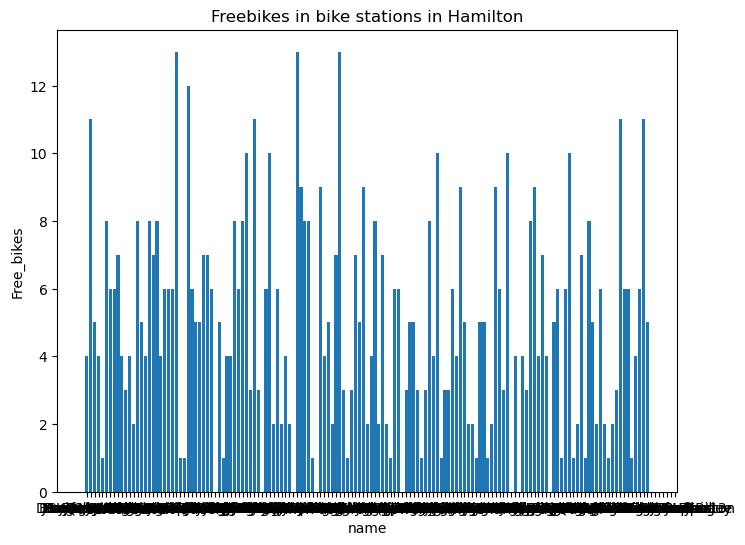

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(df['name'], df['free_bikes'])
plt.xlabel('name')
plt.ylabel('Free_bikes')
plt.title("Freebikes in bike stations in Hamilton")


plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [13]:
import sqlite3

In [24]:
#create db file from data frame from above 
dbname = 'mergeddata.db'
connect = sqlite3.connect(dbname)
df.to_sql('mergeddata', connect, if_exists='replace', index=False)
connect.commit
connect.close

<function Connection.close()>

In [28]:
cursor = connect.cursor()
cursor.execute("SELECT * FROM mergeddata")

data = cursor.fetchall()

data

[(43.259125842121065, -79.87721174955368, 4.0, 'Hess at king', None, None),
 (43.26928827622911, -79.87132698297499, 11.0, 'Bayfront Park', None, None),
 (43.26785864558976, -79.8679232597351, 5.0, 'Bay at Strachan', None, None),
 (43.26319844157448, -79.87180307507515, 4.0, 'Bay at Mulberry', None, None),
 (43.2561324863605, -79.8744987564414, 1.0, 'City Hall', None, None),
 (43.2538302267771, -79.8753935613187, 8.0, 'Bay at Bold', None, None),
 (43.2496354495324, -79.8720555723035, 6.0, 'James S at Charlton', None, None),
 (43.26456372689135, -79.8777937889099, 6.0, 'Oxford at York', None, None),
 (43.2618861338306, -79.877606006297, 7.0, 'Queen at Peter', None, None),
 (43.257877862291, -79.8561337635964, 4.0, 'West at Cannon', None, None),
 (43.26271404114188,
  -79.91580605506897,
  3.0,
  'Forsyth at Sterling',
  None,
  None),
 (43.25112644429895,
  -79.82740849256516,
  4.0,
  'Gage at Cannon - ERI11',
  None,
  None),
 (43.2540651616154, -79.8819466027797, 2.0, 'H.A.A.A. Park'

Look at the data before and after the join to validate your data.